In [ ]:
from andi_datasets.datasets_theory import datasets_theory
from andi_datasets.utils_trajectories import normalize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
AD = datasets_theory()

In [ ]:
trajs = AD.create_dataset(exponents = 1, models=np.arange(5), N_models = 1, T = 500, dimension=2)[:,2:]
# trajs = trajs.reshape(5, 500, 2)

In [ ]:
trajs.shape

(5, 1000)

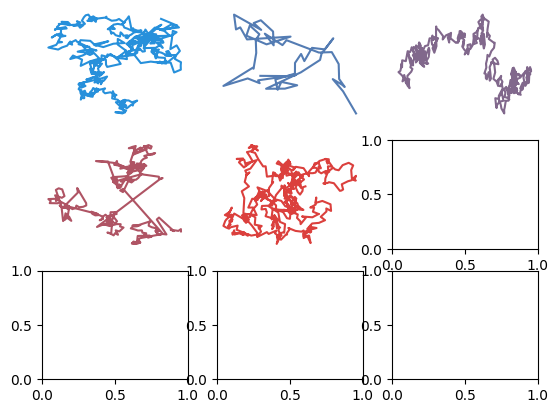

In [ ]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)
colors = cmap(np.linspace(0,1, trajs.shape[0]))

fig, axs = plt.subplots(3,3)
for t, c, ax in zip(trajs, colors, axs.flatten()):

    ax.plot(normalize(t[:500]), normalize(t[500:]), c = c)
    ax.set_axis_off()
fig.savefig('theory_models.svg')

In [ ]:
trajs = AD.create_dataset(exponents = 0.2, models=1, N_models = 10000, T = 500)[:,2:]

In [ ]:
msd = (trajs**2).mean(axis = 0)

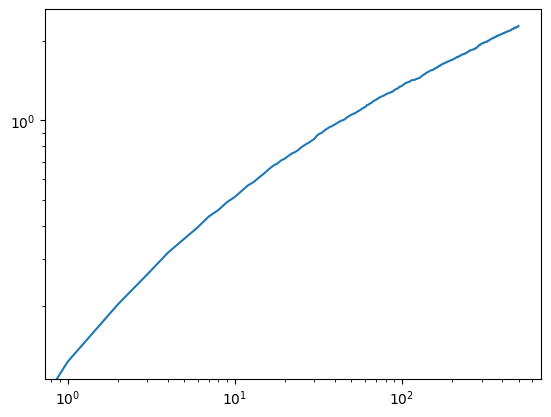

In [ ]:
plt.loglog(msd)
plt.savefig('msd.svg')

In [ ]:
#| hide
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_trajectories import inside_fov_dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
L = 200; T = 100
Ns = [20,10,10]
alphas = [1,1.5]
D = 1   

trajs, labels = models_phenom().multi_state(N = 500, L = L, T = T)

In [ ]:
fov_origin = [10,10]; fov_length = L*0.4
trajs_fov, labels_fov = inside_fov_dataset(trajs, labels, fov_origin, fov_length)

fov_origin2 = [105,90]; fov_length = L*0.4
trajs_fov2, labels_fov = inside_fov_dataset(trajs, labels, fov_origin2, fov_length)

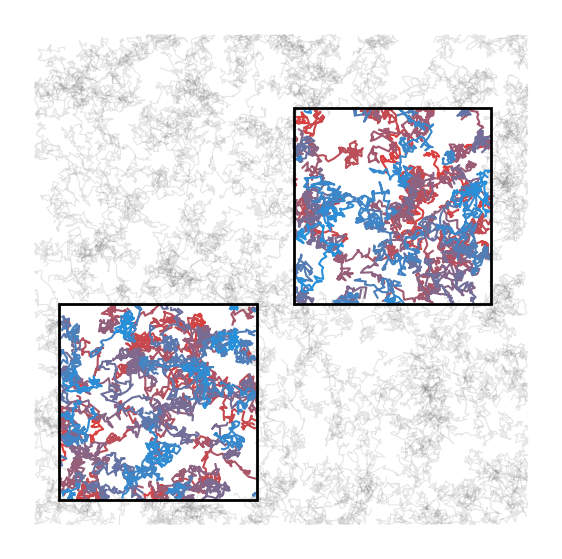

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)
colors = cmap(np.linspace(0, 1, len(trajs_fov)))

for idx, og_traj in enumerate(trajs[:, :, :].transpose(1,0,2)):
    ax.plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.1, lw = 0.8)

for t, c in zip(trajs_fov, colors[::-1, :]):
    ax.plot(t[0], t[1], c= c)    
    
colors2 = cmap(np.linspace(0, 1, len(trajs_fov2)))
for t, c in zip(trajs_fov2, colors2[::-1, :]):
    ax.plot(t[0], t[1], c= c)

# FOV
fov_min_x, fov_min_y = fov_origin
fov_max_x, fov_max_y = np.array(fov_origin)+fov_length
# currentAxis = ax.gca()
ax.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 20))

fov_min_x, fov_min_y = fov_origin2
fov_max_x, fov_max_y = np.array(fov_origin2)+fov_length
# currentAxis = ax.gca()
ax.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 20))


# Boundary
# ax.axhline(0,  alpha = 0.5, ls = '--', c = 'k', label = 'boundary')
# ax.axhline(L,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(0,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(L,  alpha = 0.5, ls = '--', c = 'k')


ax.set_axis_off()
# FOV origin
# ax.scatter(fov_origin[0], fov_origin[1], label = 'FOV origin', s = 40, zorder = 10)

# # legend = ax.legend()
# legend.get_frame().set_alpha(None)
# plt.setp(ax, xlabel = 'X (px)', ylabel = 'Y (px)')
# plt.setp(ax2, xlim = (0,L), ylim = (0,L));
plt.savefig('fov.svg')